In [25]:
# from tensorflow.keras.datasets import imdb
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, Flatten
# from tensorflow.keras.preprocessing import sequence

# # Load the dataset
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# # Pad the sequences to the same length
# X_train = sequence.pad_sequences(X_train, maxlen=250)  # Reduced sequence length
# X_test = sequence.pad_sequences(X_test, maxlen=250)  # Reduced sequence length

# # Define the model
# model = Sequential([
#     Embedding(5000, 32, input_length=250),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=4, batch_size=64, verbose=1)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print("Accuracy: %.2f%%" % (accuracy*100))

Epoch 1/4
391/391 [==============================] - 10s 24ms/step - loss: 0.4140 - accuracy: 0.7906
Epoch 2/4
391/391 [==============================] - 10s 25ms/step - loss: 0.1438 - accuracy: 0.9488
Epoch 3/4
391/391 [==============================] - 10s 24ms/step - loss: 0.0291 - accuracy: 0.9931
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.5648 - accuracy: 0.8586
Accuracy: 85.86%


In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing import sequence

In [2]:
#  The default split ratio is approximately 50% for training data and 50% for test data. However, the exact number of samples in each set can vary slightly due to rounding.
# Load the dataset
(train_data,train_label),(test_data,test_label) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 5s 0us/step


def vectorize_sequences(sequences, dimensions=10000):: Defines a function named vectorize_sequences that takes two parameters:
sequences: A list of sequences (lists of integers) representing movie reviews.
dimensions: The total number of unique words in the vocabulary. By default, it's set to 10,000.
results = np.zeros((len(sequences), dimensions)): Creates a NumPy array of shape (len(sequences), dimensions) filled with zeros. This array will store the vectorized representation of the sequences.
for i, sequence in enumerate(sequences):: Iterates over each sequence in the sequences list along with its index i.
results[i, sequence] = 1: Sets the elements in the results array corresponding to the indices provided by the sequence to 1. This creates a binary matrix representation of the sequences, where each row represents a sequence and each column represents a word in the vocabulary. If a word appears in the sequence, the corresponding element in the row is set to 1; otherwise, it remains 0.

In [3]:
import numpy as np

def vectorize_sequences(sequences,dimensions=10000):
    results = np.zeros((len(sequences),dimensions))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
        
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_label).astype('float32')
y_test= np.asarray(test_label).astype('float32')

In [5]:
from keras.models import Sequential
from keras.layers import Dense

Input Layer:
model.add(Dense(16, input_shape=(10000,), activation='relu'))
This adds a dense layer with 16 units (neurons) and ReLU activation function.
The input_shape=(10000,) parameter specifies that the input to this layer has 10,000 features (assuming a vocabulary size of 10,000 for vectorized sequences).

Hidden Layers:
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
These lines add three additional dense layers with 16, 8, and 4 units, respectively, each using the ReLU activation function.
These layers are commonly referred to as hidden layers as they are not directly connected to the input or output.

Output Layer:
model.add(Dense(1, activation='sigmoid'))
This adds the output layer with a single unit and sigmoid activation function.
The sigmoid activation function is suitable for binary classification tasks as it squashes the output values between 0 and 1, representing the probability of the positive class (e.g., sentiment being positive).

In [6]:
model = Sequential()

model.add(Dense(16,input_shape=(10000,),activation='relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [7]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 160465 (626.82 KB)
Trainable params: 160465 (626.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Verbose:
verbose controls the verbosity mode during training. It specifies how the training progress is displayed.
It can take one of the following values:
0: Silent mode. The training progress will not be displayed on the console during training.
1: Verbose mode (default). Progress bars will be displayed showing the training and validation loss and metrics for each epoch.
2: One line per epoch. Only the summary of training and validation loss and metrics for each epoch will be displayed.

Batch Size:
batch_size determines the number of samples that will be processed in each training iteration (batch) before updating the model's parameters.

In [9]:
history = model.fit(x_train,y_train,validation_split=0.2,epochs=20,verbose=1,batch_size=512)


Epoch 1/20
40/40 [==============================] - 4s 54ms/step - loss: 0.1932 - accuracy: 0.7276 - val_loss: 0.1321 - val_accuracy: 0.8832
Epoch 2/20
40/40 [==============================] - 1s 25ms/step - loss: 0.0861 - accuracy: 0.9136 - val_loss: 0.0922 - val_accuracy: 0.8788
Epoch 3/20
40/40 [==============================] - 1s 26ms/step - loss: 0.0506 - accuracy: 0.9455 - val_loss: 0.0855 - val_accuracy: 0.8836
Epoch 4/20
40/40 [==============================] - 1s 25ms/step - loss: 0.0368 - accuracy: 0.9614 - val_loss: 0.0855 - val_accuracy: 0.8884
Epoch 5/20
40/40 [==============================] - 1s 25ms/step - loss: 0.0277 - accuracy: 0.9736 - val_loss: 0.0884 - val_accuracy: 0.8814
Epoch 6/20
40/40 [==============================] - 1s 26ms/step - loss: 0.0213 - accuracy: 0.9815 - val_loss: 0.0897 - val_accuracy: 0.8848
Epoch 7/20
40/40 [==============================] - 1s 25ms/step - loss: 0.0163 - accuracy: 0.9862 - val_loss: 0.0938 - val_accuracy: 0.8806
Epoch 8/20
40

In [10]:
mse,mae = model.evaluate(x_test,y_test)

print('MSE ',mse)
print('MAE ',mae)

782/782 [==============================] - 3s 4ms/step - loss: 0.1172 - accuracy: 0.8626
MSE  0.11716283857822418
MAE  0.862559974193573


In [12]:
y_preds = model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


In [13]:
y_preds


array([[4.1691408e-02],
       [9.9961877e-01],
       [7.9639599e-04],
       ...,
       [6.6253953e-02],
       [5.1027955e-04],
       [8.5745743e-03]], dtype=float32)

In [14]:
tests=[]
for i in y_test:
    tests.append(int(i))
preds=[]
for i in y_preds:
    if i[0]>0.5:
        preds.append(1)
    else:
        preds.append(0)
from sklearn.metrics import accuracy_score,precision_score,recall_score

print(accuracy_score(tests,preds))
print(precision_score(tests,preds))
print(recall_score(tests,preds))

0.86256
0.870140476968311
0.85232


return_token(tid):
This function takes a token ID as input (tid) and returns the corresponding word in the review.
It iterates over the items in the word_index dictionary (which maps words to their integer indices) to find the word that corresponds to the given token ID.
The function takes into account that the IMDb dataset's word indices are offset by 3, as the indices 0, 1, and 2 are reserved for "padding", "start of sequence", and "unknown" tokens, respectively.
If the token ID is not found in the word_index dictionary, the function returns '?'.
print_review(id_):
This function takes a review ID (id_) as input and prints the corresponding movie review.
It first retrieves the sequence of token IDs representing the review from train_data.
Then, it uses the return_token() function to convert each token ID into its corresponding word.
Finally, it joins these words into a single string, representing the movie review text.
The resulting string is returned.
These functions can be used to interpret and print individual movie reviews from the IMDb dataset. The print_review() function, in particular, allows you to view the text of a specific review by passing its index as an argument.

In [15]:
word_index = imdb.get_word_index()
def return_token(tid):
    for k,v in word_index.items():
        # We decode the review; note that our indices were offset by 3
        # because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
        if v==tid-3:
            return k
    return '?'
def print_review(id_):
    sentence = ' '.join(return_token(i) for i in train_data[id_])
    return sentence

1641221/1641221 [==============================] - 0s 0us/step


In [16]:
print_review(0)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [17]:
train_label[0] #Positive


1

In [18]:
print_review(2)

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

In [19]:
train_label[2] # Negative

0

In [20]:
print_review(3)

"? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prot

In [21]:
train_label[3]

1

782/782 [==============================] - 3s 3ms/step


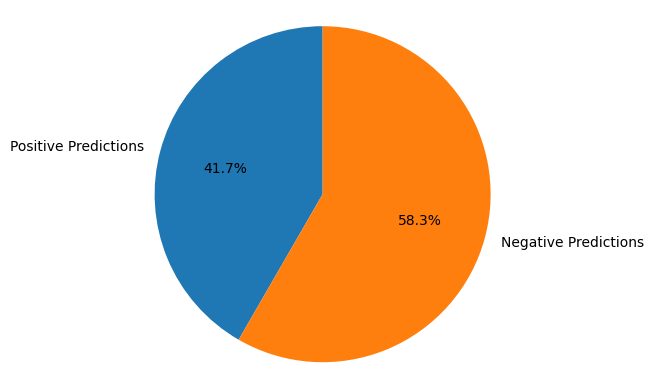

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.92).astype(int)  # Convert probabilities to class labels

# Count positive and negative predictions
positive_predictions = np.sum(y_pred)
negative_predictions = len(y_pred) - positive_predictions

# Plot the pie chart
labels = 'Positive Predictions', 'Negative Predictions'
sizes = [positive_predictions, negative_predictions]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()